In [156]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/xzhang/Documents/covid/county_covid_seir_models/')

import numpy as np
import pandas as pd
import pickle
from pyseir import load_data
from pyseir.models.seir_model import SEIRModel
from pyseir.models.suppression_policies import generate_triggered_suppression_model
import matplotlib.pyplot as plt
from pyseir.inference.initial_conditions_fitter import InitialConditionsFitter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This notebook aims to validate our SEIR model against study:   
https://www.medrxiv.org/content/10.1101/2020.02.12.20022566v1.full.pdf

The above study assumes each model parameter follows a certain distribution, and simulate the trajectory by sampling from the parameter distribution. To simplify the process, we used the mean value of each model parameter and compare the peak time predicted by our SEIR model with their results. 

Parameters from the study:  

- incubation period: 5.2 days
- reproduction number: 2.2
- infectious period: 2.5
- initial population size: 59,115,809 (total population in England and Wales)
- hospitalization relevant parameters: 0
- control measure relevant parameters: 0

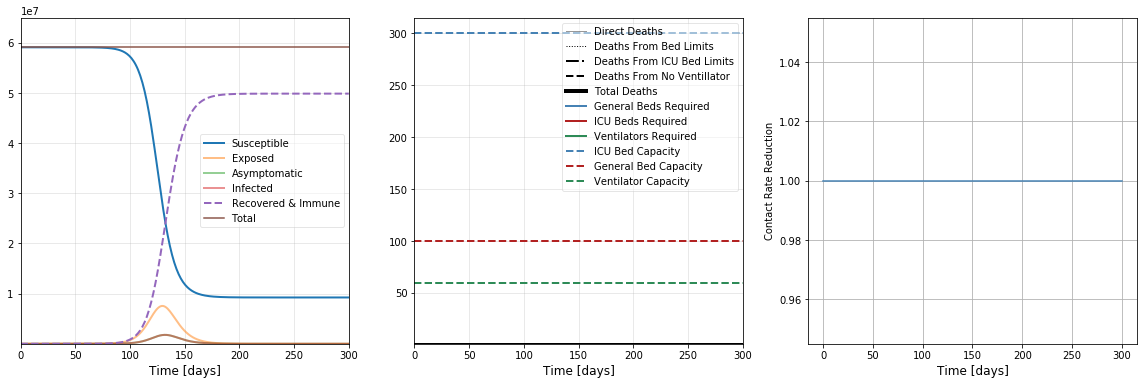

In [163]:
n_days =300
t_list = np.linspace(0, n_days, n_days)
suppression_policy = generate_triggered_suppression_model(t_list=t_list, lockdown_days=0, open_days=0, reduction=1)


model = SEIRModel(
    N=59115809,
    R0=2.2,
    A_initial=1,
    I_initial=1,
    sigma=1/5.2, 
    delta=1/2.5,
    t_list=t_list,
    hospitalization_rate_general=0,
    hospitalization_rate_icu=0,
    mortality_rate=0,
    suppression_policy=suppression_policy)

model.run()
model.plot_results(y_scale='linear')


gr_predicted_peak_time 132.0
third_party_model_peak_time 133


Text(0.5, 0, 'days')

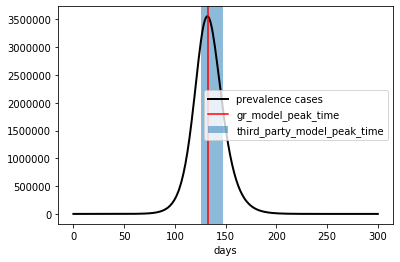

In [167]:
plt.plot(model.t_list, model.results['A'] + model.results['I'], lw=2, color='k', label='prevalence cases')
t_max_idx = np.argmax(model.results['A'] + model.results['I'])
peak_time = model.t_list[t_max_idx]
print('gr_predicted_peak_time', round(peak_time,0))
print('third_party_model_peak_time', 133)
plt.axvline(x=peak_time, color='r', label='gr_model_peak_time')
plt.axvspan(xmin=126, xmax=147, alpha=0.5, label='third_party_model_peak_time')
plt.legend()
plt.xlabel('days')